<a href="https://colab.research.google.com/github/jumafernandez/SIyBD-UNTreF/blob/main/codigo/notebooks/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering con K-means

En esta notebook, compartimos el entrenamiento de un modelo de agrupamiento a través de la técnica de ensamble *K-means*.


En primer lugar, se cargan las librerías necesarias y el dataset desde el módulo `sklearn.datasets`:

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

Hacemos algunas exploraciones básicas del dataset:

In [4]:
# Ver las primeras filas del conjunto de datos
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Verificamos tipos de datos y valores faltantes:

In [6]:
# Tipo de datos de cada columna
print(df.info())

# Resumen de estadísticas descriptivas para cada columna
print(df.describe())

# Comprobar si hay valores nulos
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000 

Se inicializa y entrena el modelo con los datos de entrenamiento:

In [7]:
# Realizar el clustering K-Means con 3 clusters
numero_clusters = 3
kmeans = KMeans(n_clusters=numero_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Se verifican las  asignaciones de centroides de cada cluster y se incorpora el cluster asignado a cada instancia:

In [8]:
# Ver los resultados del clustering
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [10]:
# Añadir las etiquetas de cluster al conjunto de datos original
df['cluster'] = kmeans.labels_

# Ver las primeras filas del conjunto de datos con las etiquetas de cluster
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


Se verifican los resultados obtenidos gráficamente:

Text(0.5, 1.0, 'Clustering K-Means de Flores Iris (Sepal.Length vs Sepal.Width)')

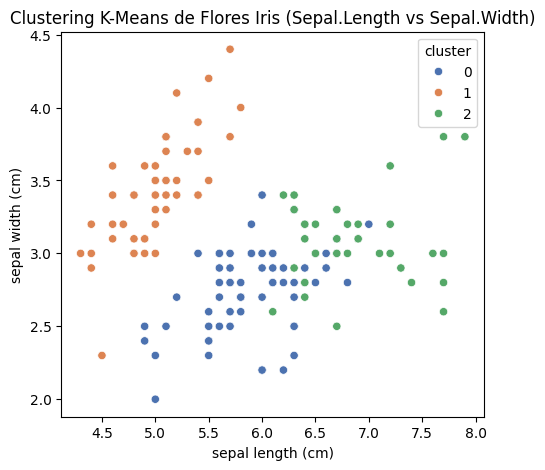

In [12]:
# Visualizar los resultados del clustering con gráficos
plt.figure(figsize=(12, 5))

# Diagrama de dispersión de Sepal.Length y Sepal.Width coloreado por el cluster
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['cluster'], palette="deep")
plt.title("Clustering K-Means de Flores Iris (Sepal.Length vs Sepal.Width)")

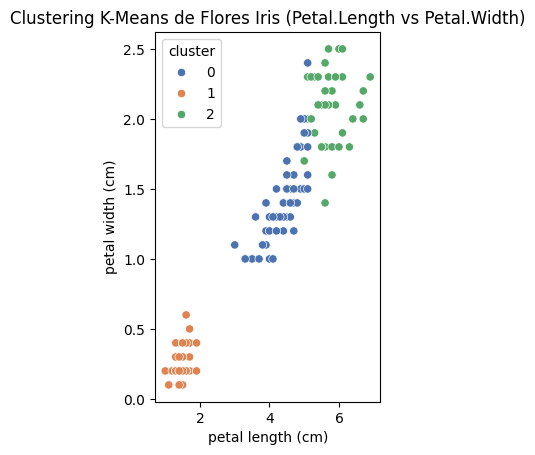

In [13]:
# Diagrama de dispersión de Petal.Length y Petal.Width coloreado por el cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['cluster'], palette="deep")
plt.title("Clustering K-Means de Flores Iris (Petal.Length vs Petal.Width)")
plt.show()

Ahora verificamos para el coeficiente de silueta, cual es el k óptimo:

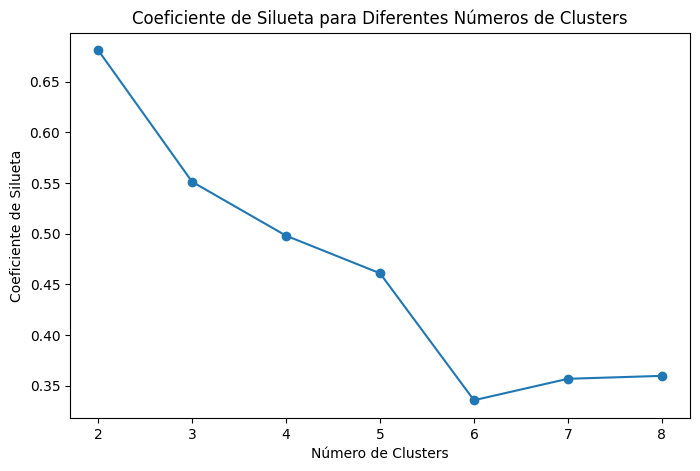

In [17]:
# Calcular el coeficiente de silueta para varios números de clusters
rango_clusters = range(2, 9)
coeficientes_silueta = []

for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = kmeans.fit_predict(df.iloc[:, :-1])
    silhouette_avg = silhouette_score(df.iloc[:, :-1], labels)
    coeficientes_silueta.append(silhouette_avg)

# Crear un gráfico del coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, coeficientes_silueta, marker='o')
plt.title("Coeficiente de Silueta para Diferentes Números de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de Silueta")
plt.show()

Por último, se verifica el k óptimo mediante el método de Elbow:

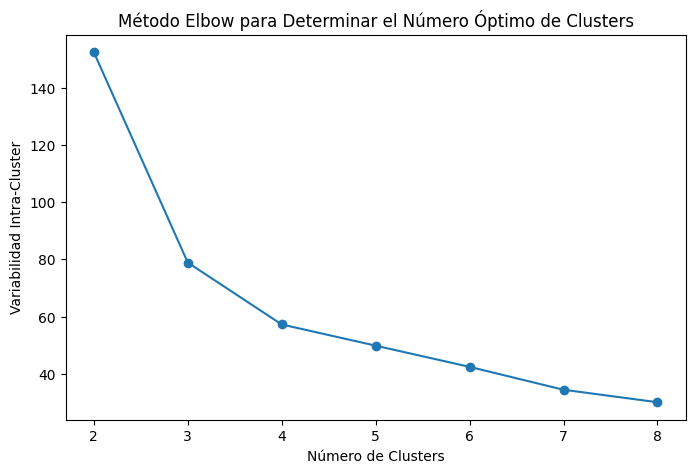

In [19]:
# Cálculo del método Elbow para la variabilidad intra-cluster
variabilidad_intra_cluster = []

for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(df.iloc[:, :-1])
    variabilidad_intra_cluster.append(kmeans.inertia_)

# Crear un gráfico del método Elbow
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, variabilidad_intra_cluster, marker='o')
plt.title("Método Elbow para Determinar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Variabilidad Intra-Cluster")
plt.show()